In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process

c:\users\laptop shop\appdata\local\programs\python\python38\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv("data/candyhierarchy2017.csv", encoding='latin-1')

In [3]:
df.head(3)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 113", "Internal ID", "Click Coordinates (x, y)", "Q5: STATE, PROVINCE, COUNTY, ETC", 'Q9: OTHER COMMENTS', 
        'Q8: DESPAIR OTHER', 'Q7: JOY OTHER'] , axis="columns", inplace=True)

In [5]:
df = df.dropna(subset = ['Q3: AGE'])
df = df[df['Q3: AGE'].apply(lambda x: x.isnumeric())]
df['Q3: AGE'] = df['Q3: AGE'].astype('int')
df = df[df['Q3: AGE'] < 90 ]
df = df[df['Q3: AGE'] > 3 ]

In [6]:
df['Q3: AGE'].unique()

array([44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45, 25, 34,
       35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42, 62, 29,
       39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19, 57, 60, 66, 12,
       55, 72, 21, 11,  9, 68, 20,  6, 10, 71, 13,  7, 88, 74, 17, 15,  8,
       75, 14, 76, 77, 73,  4])

In [7]:
df = df.dropna(subset = ['Q4: COUNTRY'])

In [8]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip()
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.lower()
df['Q4: COUNTRY'].unique()

array(['usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'greece', 'usa? hard to tell anymore..',
       "'merica", 'usas', 'pittsburgh', 'united state', 'can', 'canae',
       'new york', 'trumpistan', 'ireland', 'united sates', 'korea',
       'california', 'japan', 'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ud', 'south korea', 'new jersey', 'indonesia',
       'united ststes', 'the netherlands', 'unite

In [9]:
countries = pd.Series(['usa', 'united states of america', 'united kingdom england', 'hong kong', 'china', 'sweden', 'spain', 'ireland', 'taiwan', 'singapore', 'netherlands', 
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa', 
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])

In [10]:
for country in countries:
    matches = process.extract(country, df['Q4: COUNTRY'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q4: COUNTRY'] == potential_match[0], 'Q4: COUNTRY'] = country

In [11]:
df['Q4: COUNTRY'].unique()

array(['usa', 'canada', 'murica', 'united states of america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', 'france', 'finland',
       'north carolina', 'netherlands', 'germany', 'europe', 'u.k.',
       'costa rica', 'cascadia', 'australia', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'iceland', 'south korea', 'california', 'japan',
       'south africa', 'scotland', 'denmark', 'switzerland', 'ud',
       'new jersey', 'indonesia', 'endland', 'murrika',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'u s a', "i don't know anymore"],
      dtype=object)

In [12]:
mapping = {'murica':'india', 'united states of america':'usa', 'u.s.a.':'usa',
'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'murrika':'india', 'soviet canuckistan':'canada', 
          'hong kong':'china', 'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'canae':'turkey', 'cascadia':'usa'}
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(mapping)

In [13]:
df.drop(df.loc[df['Q4: COUNTRY'] == 'narnia' ].index, inplace=True)
df.drop(df.loc[df['Q4: COUNTRY'] == 'europe' ].index, inplace=True)
df.drop(df.loc[df['Q4: COUNTRY'] == "i don't know anymore" ].index, inplace=True)
df['Q4: COUNTRY'].value_counts()

usa             2020
canada           222
uk                21
germany           10
australia          7
netherlands        7
scotland           5
iceland            5
japan              5
mexico             4
china              4
france             3
switzerland        3
india              2
sweden             2
denmark            2
south korea        2
greece             1
costa rica         1
spain              1
south africa       1
finland            1
singapore          1
turkey             1
taiwan             1
uae                1
indonesia          1
Name: Q4: COUNTRY, dtype: int64

In [14]:
df['Q1: GOING OUT?']=df['Q1: GOING OUT?'].fillna('Maybe')

In [15]:
df['Q2: GENDER']=df['Q2: GENDER'].fillna("I'd rather not say")
df['Q2: GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [16]:
df = df.astype({'Q1: GOING OUT?':'category', 'Q2: GENDER':'category', 'Q4: COUNTRY':'category',
                'Q10: DRESS':'category', 'Q11: DAY':'category'})

In [17]:
candy = df.iloc[:,5:-6]

In [18]:
candy = candy.dropna(how='all')

In [19]:
df = df.rename(columns = {'Q1: GOING OUT?' : 'GoingOut', 'Q2: GENDER' : 'Gender', 'Q3: AGE': 'Age', 'Q4: COUNTRY' : 'Country',
                           'Q10: DRESS' : 'Dress', 'Q11: DAY': 'Day', 'Q12: MEDIA [Daily Dish]' : 'MediaDailyDish',
                          'Q12: MEDIA [Science]': 'MediaScience', 'Q12: MEDIA [ESPN]' : 'MediaESPN','Q12: MEDIA [Yahoo]': 'MediaYahoo'})

In [20]:
df.head(2)

,GoingOut,Gender,Age,Country,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),...,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Dress,Day,MediaDailyDish,MediaScience,MediaESPN,MediaYahoo
1,No,Male,44,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,Maybe,Male,49,usa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df['Country'] = df['Country'].str.upper()

In [22]:
media = df.iloc[:,-4:]

In [23]:
media.loc[media['MediaDailyDish'] == 1.0, 'MediaDailyDish'] = 'DailyDish'
media.loc[media['MediaScience'] == 1.0, 'MediaScience'] = 'Science'
media.loc[media['MediaESPN'] == 1.0, 'MediaESPN'] = 'ESPN'
media.loc[media['MediaYahoo'] == 1.0, 'MediaYahoo'] = 'Yahoo'

In [24]:
media = media.dropna(how='all')

In [25]:
media['Media'] = media[media.columns[:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)

In [26]:
media = media.loc[:, ['Media']]
media['Media'].astype('category')

1         Science
3         Science
4         Science
7         Science
8         Science
          ...    
2453      Science
2454      Science
2456      Science
2457      Science
2459    DailyDish
Name: Media, Length: 1558, dtype: category
Categories (4, object): [DailyDish, ESPN, Science, Yahoo]

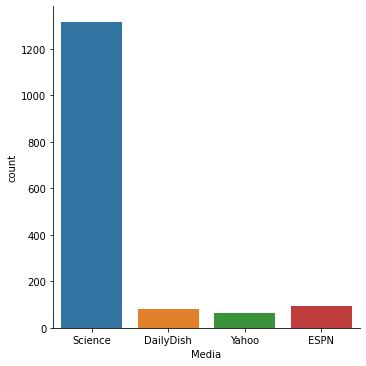

In [27]:
sns.catplot(x='Media', data=media, kind='count')
plt.show()

In [28]:
candy.columns = [x for x in candy.columns.str.replace("Q6 \| ",'')]

In [29]:
candy.head(2)

,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR


In [30]:
candymelt = candy.melt()

In [31]:
candymelt['variable'].value_counts()

Green Party M&M's           1736
Chardonnay                  1736
HersheyÕs Milk Chocolate    1736
Bonkers (the candy)         1736
Regular M&Ms                1736
                            ... 
Necco Wafers                1736
Pixy Stix                   1736
Good N' Plenty              1736
Kinder Happy Hippo          1736
Any full-sized candy bar    1736
Name: variable, Length: 102, dtype: int64

c:\users\laptop shop\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\laptop shop\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\laptop shop\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
c:\users\laptop shop\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.


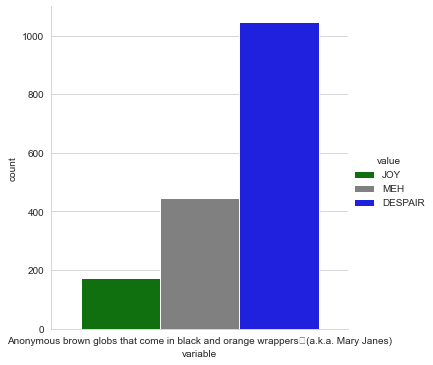

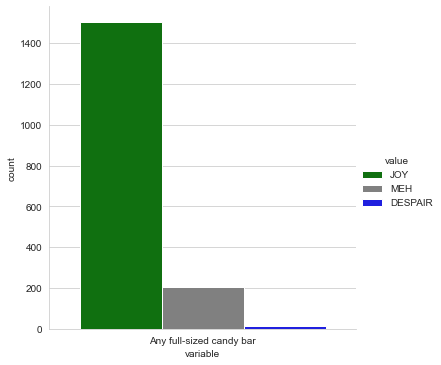

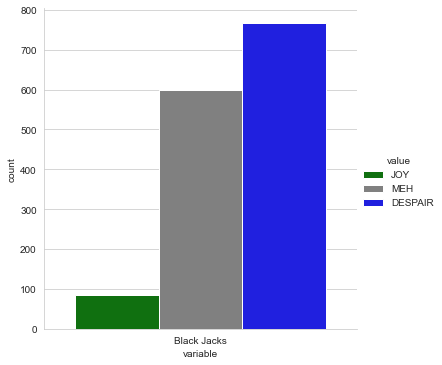

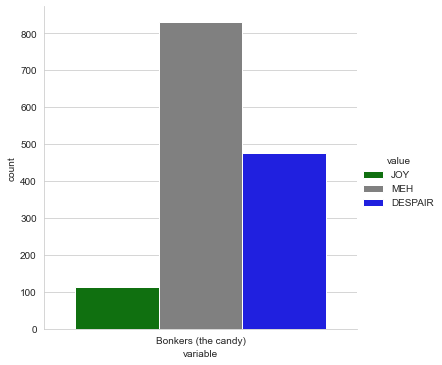

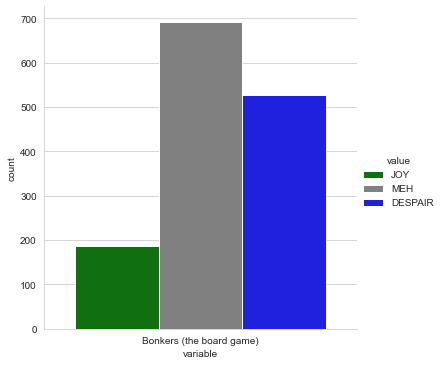

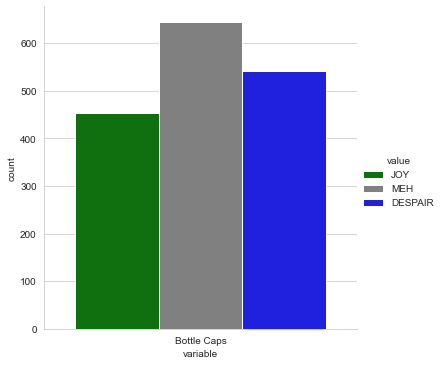

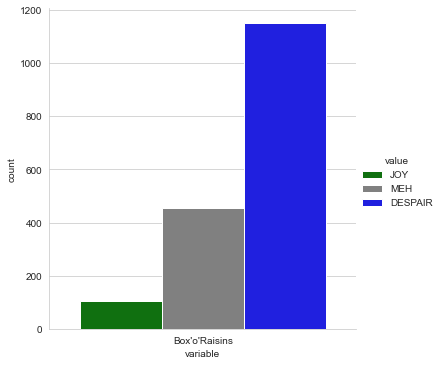

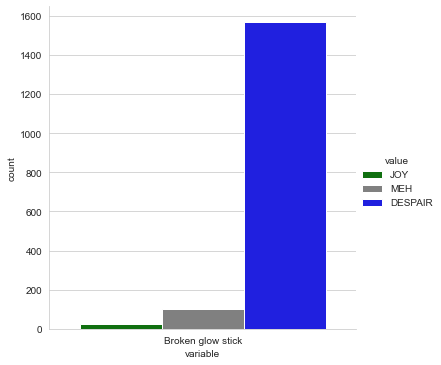

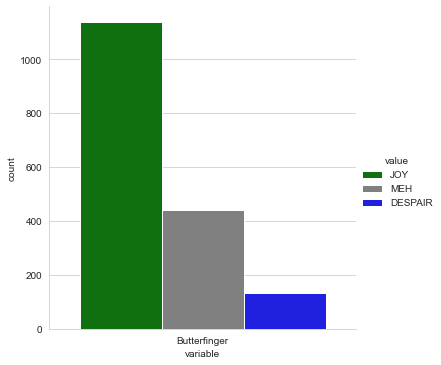

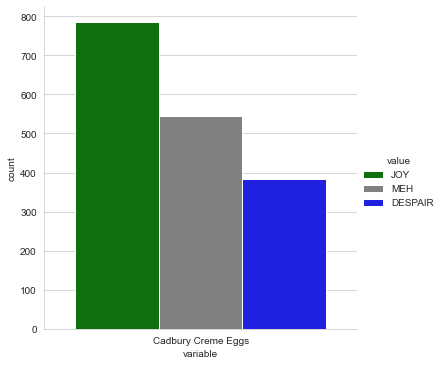

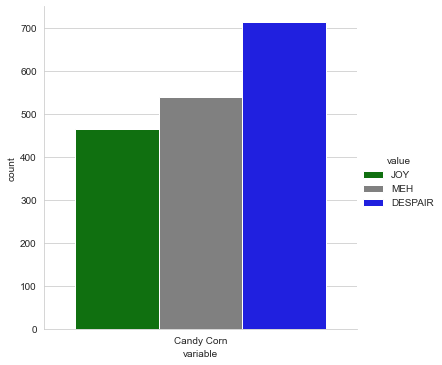

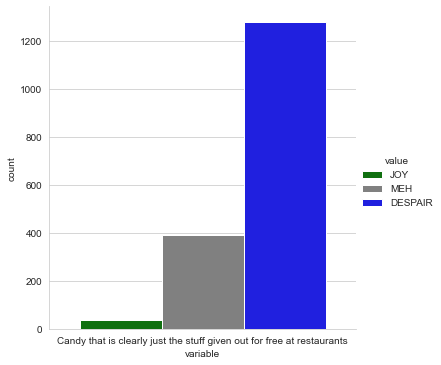

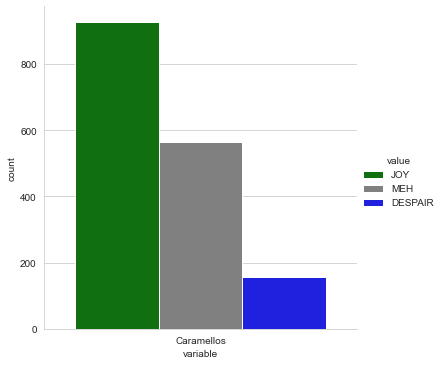

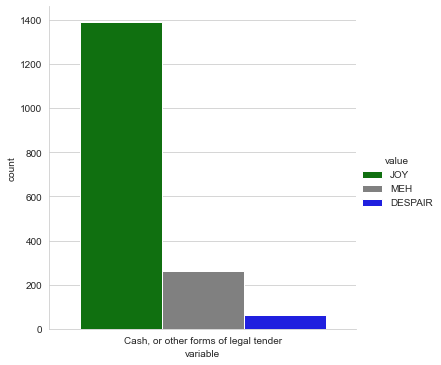

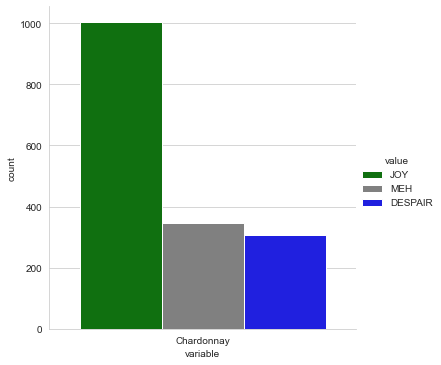

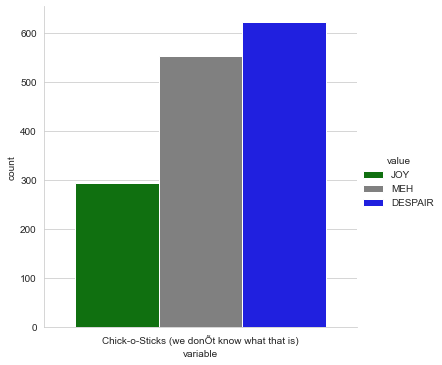

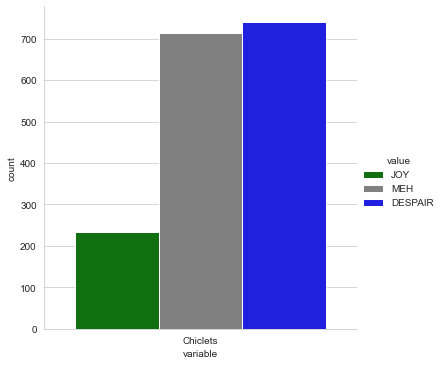

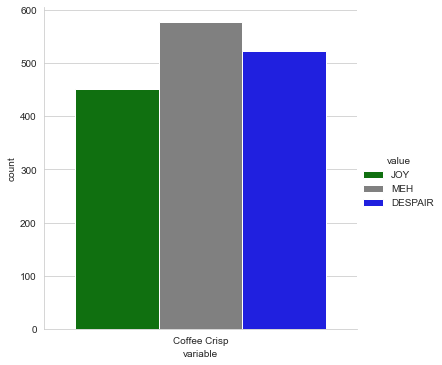

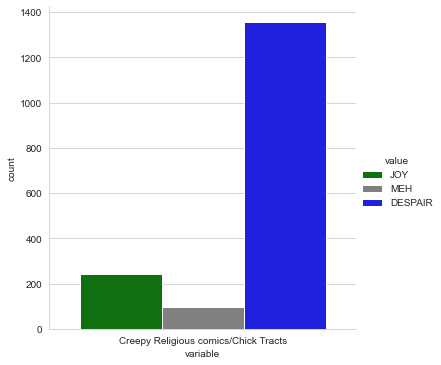

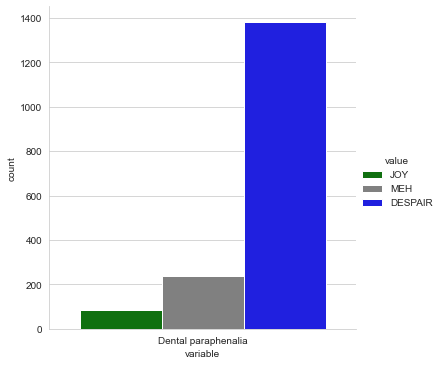

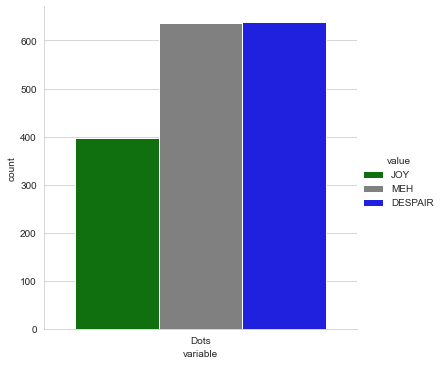

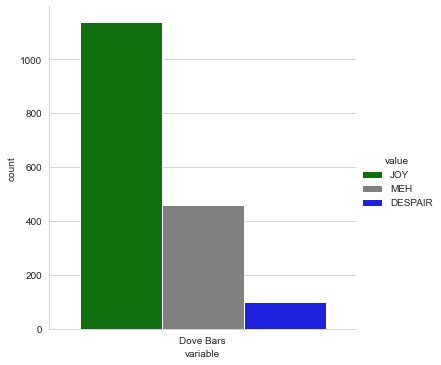

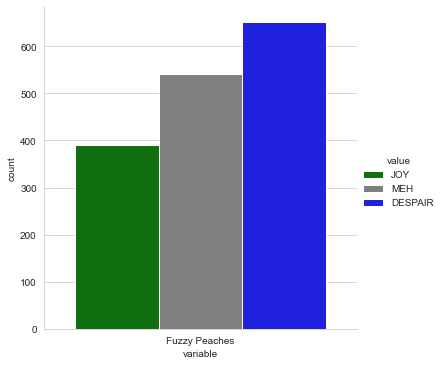

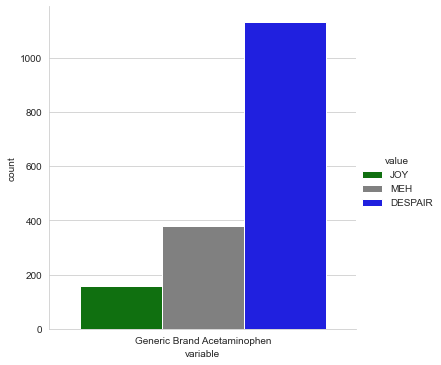

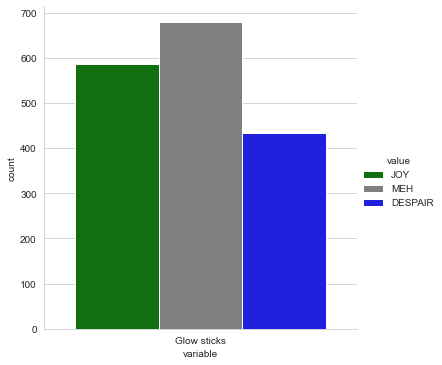

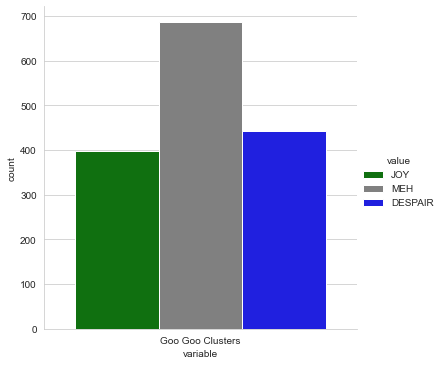

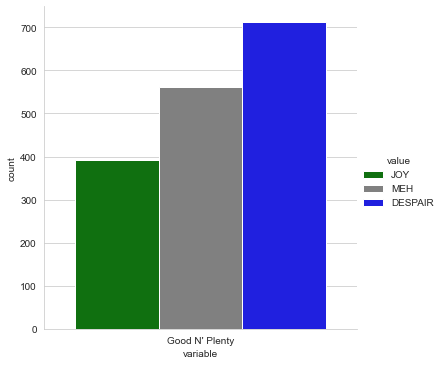

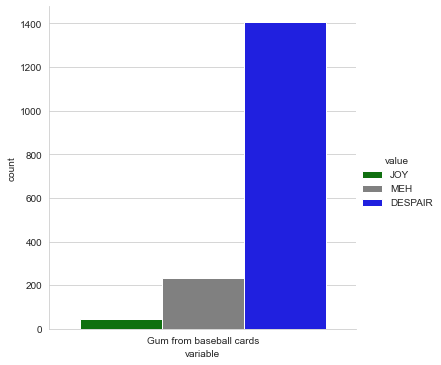

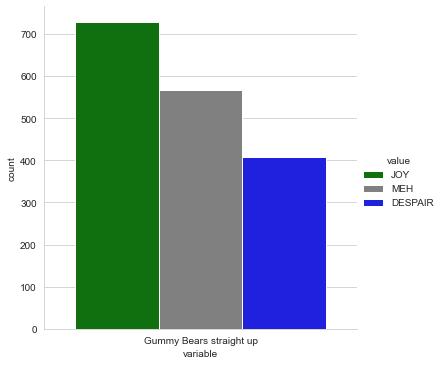

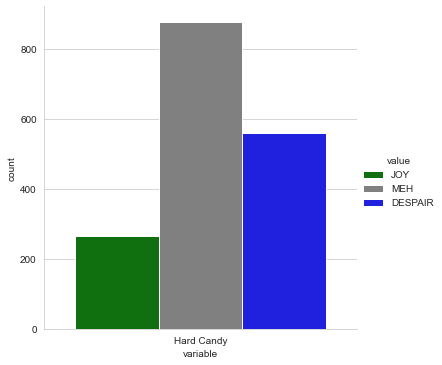

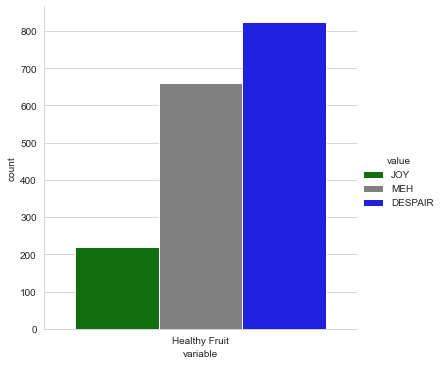

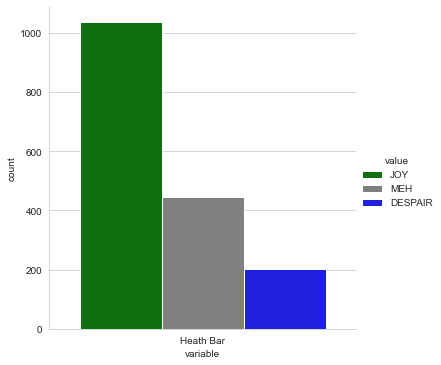

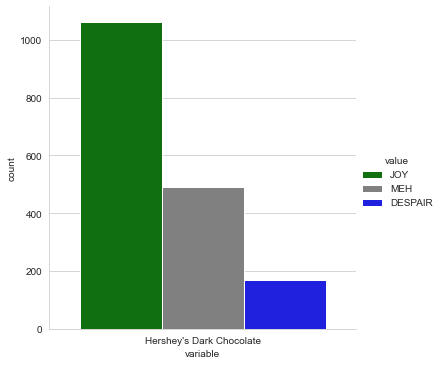

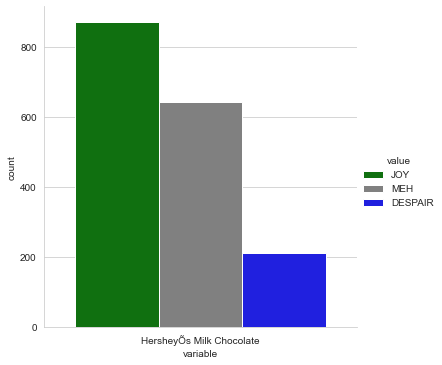

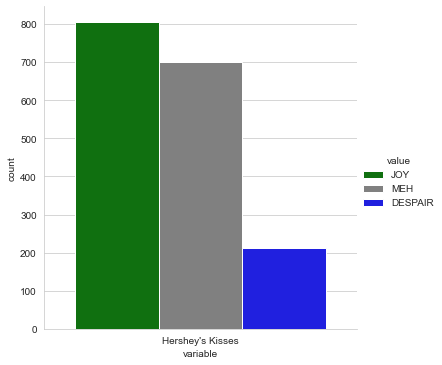

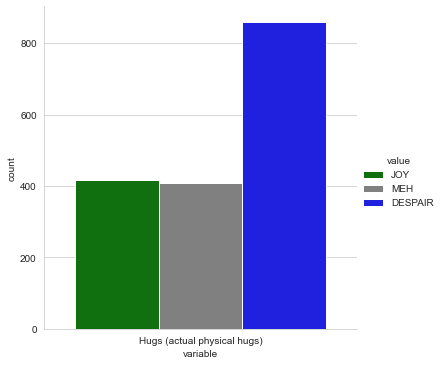

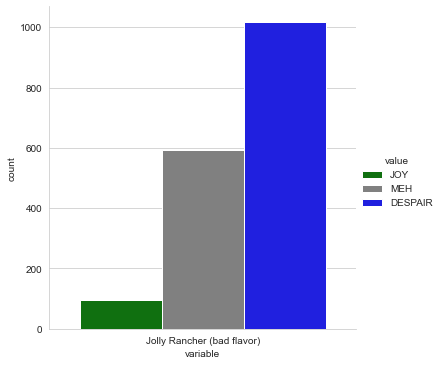

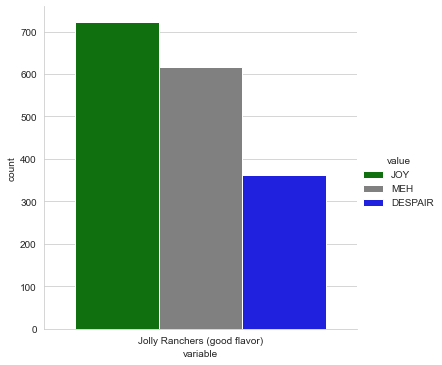

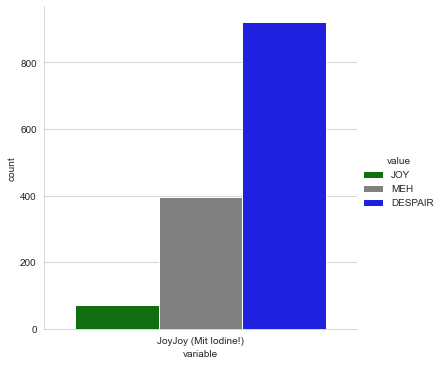

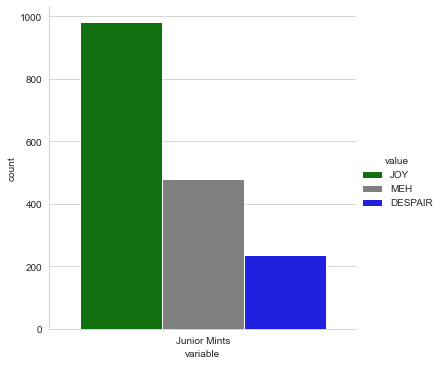

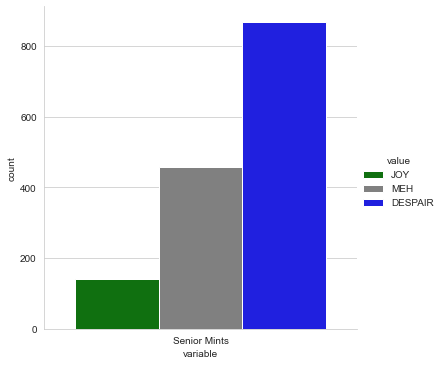

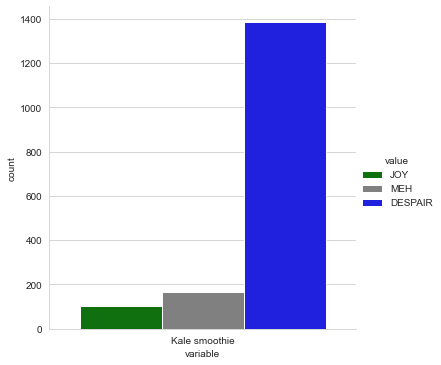

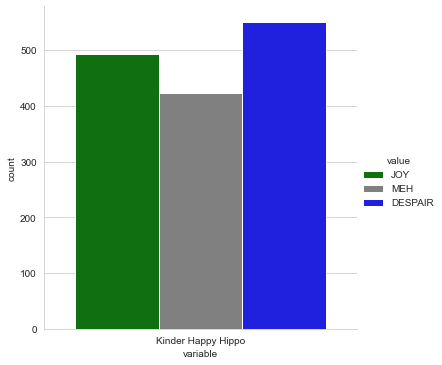

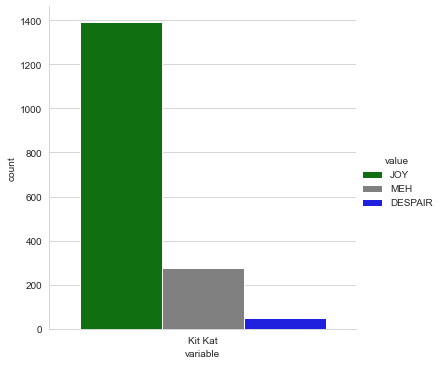

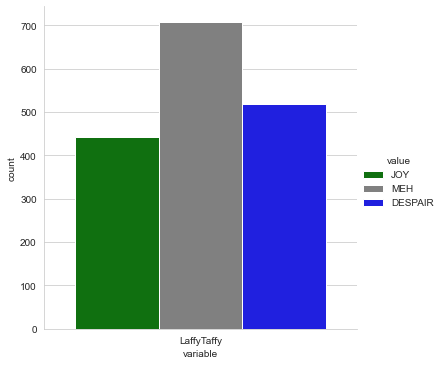

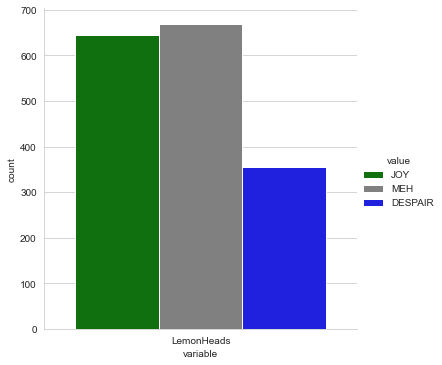

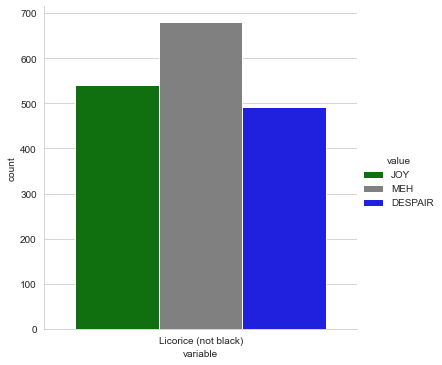

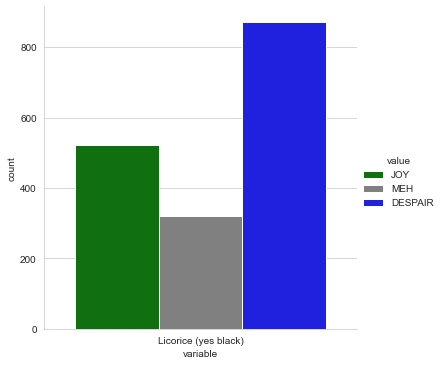

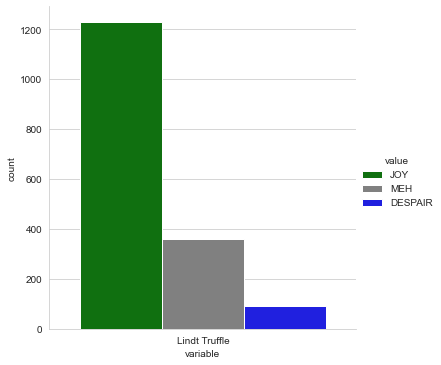

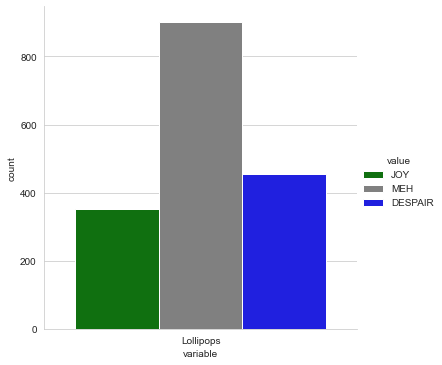

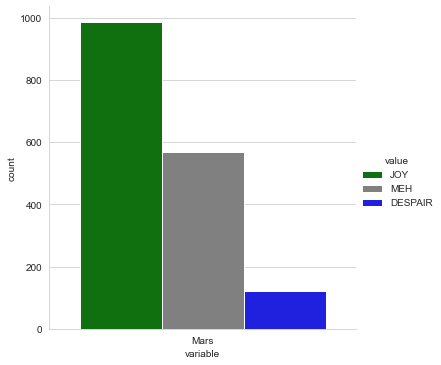

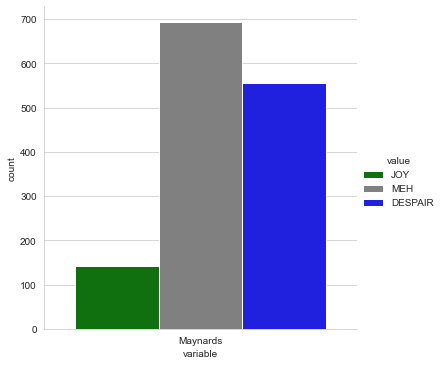

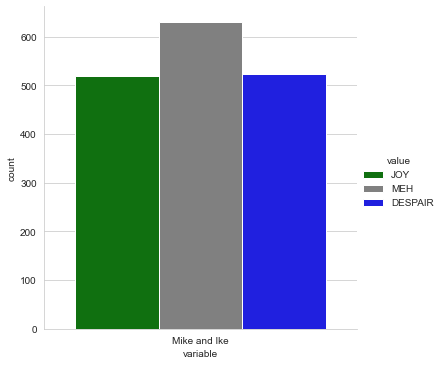

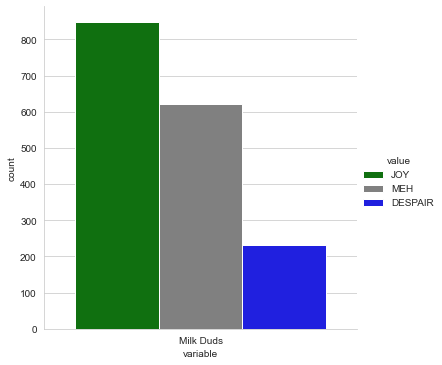

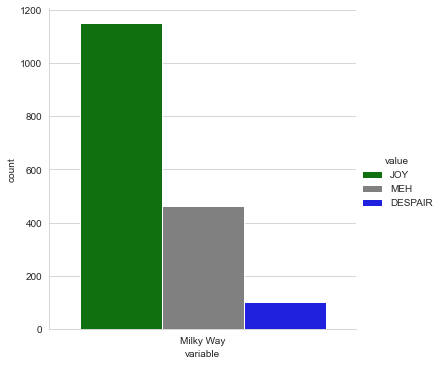

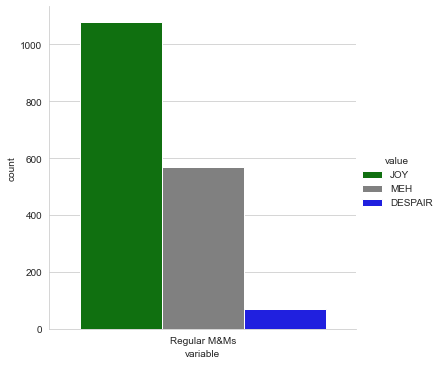

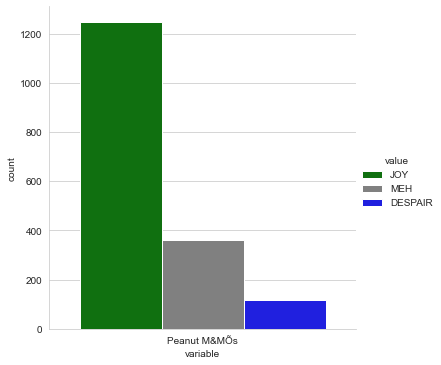

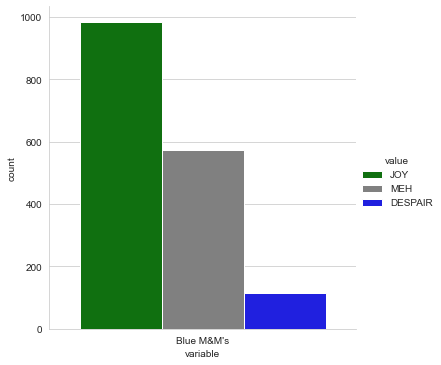

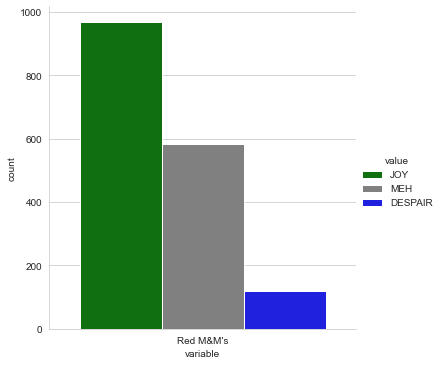

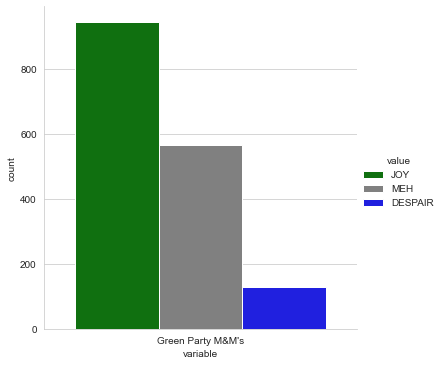

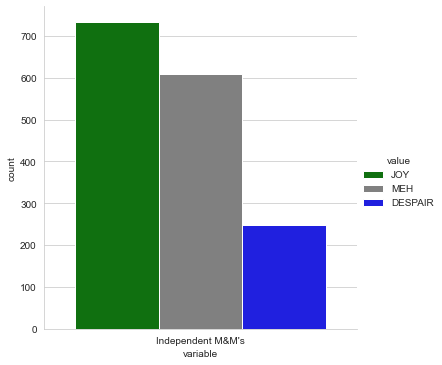

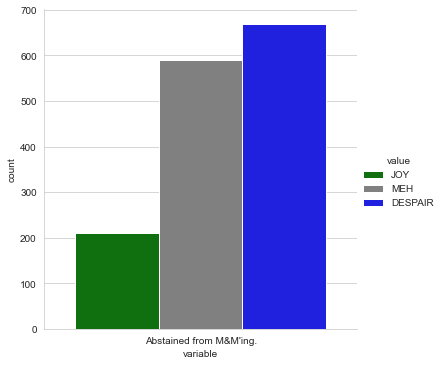

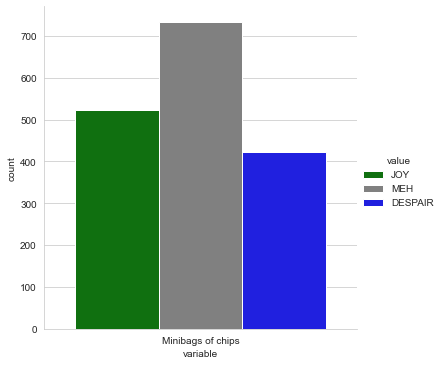

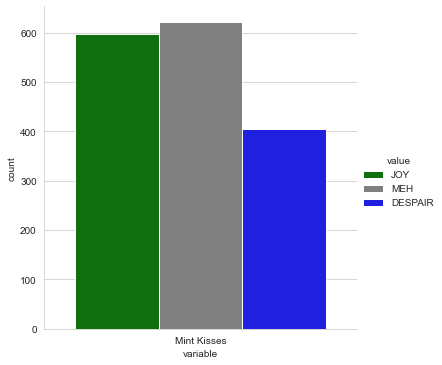

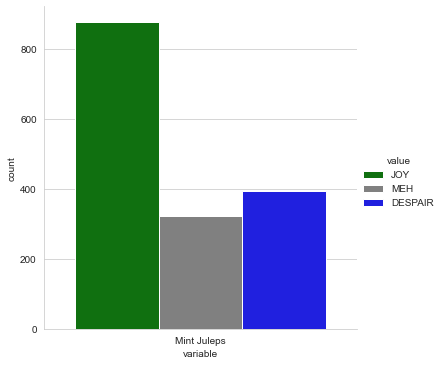

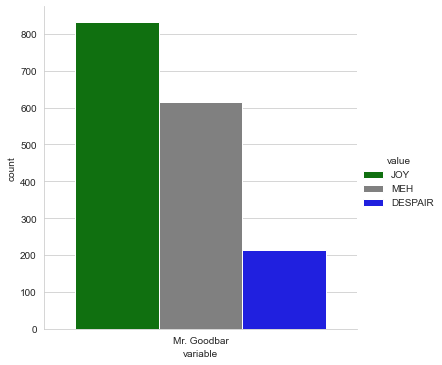

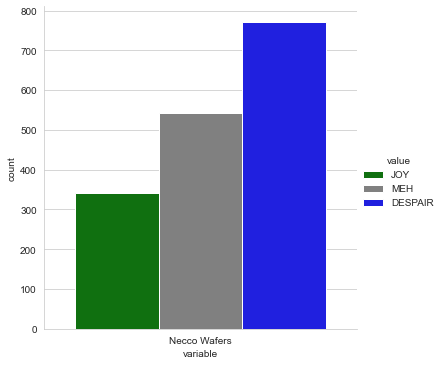

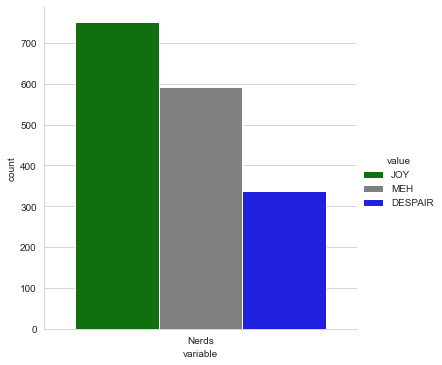

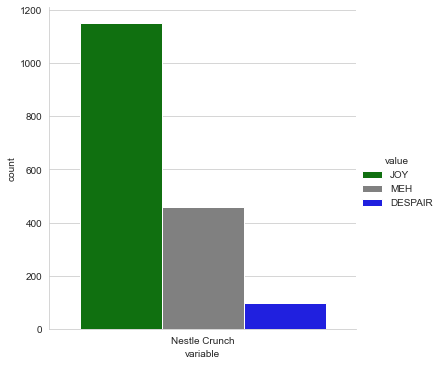

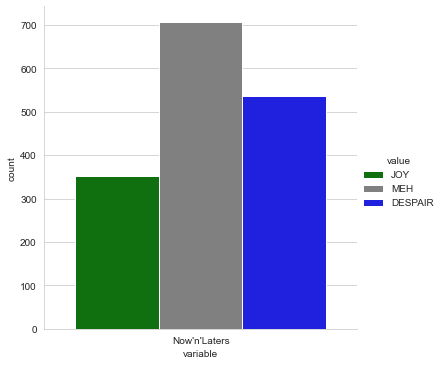

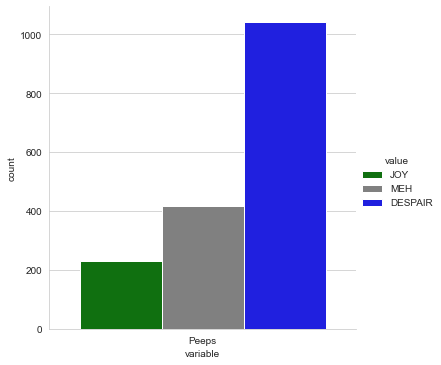

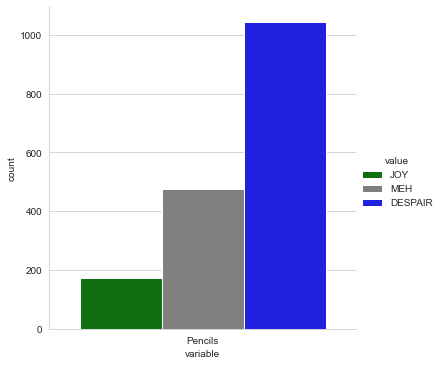

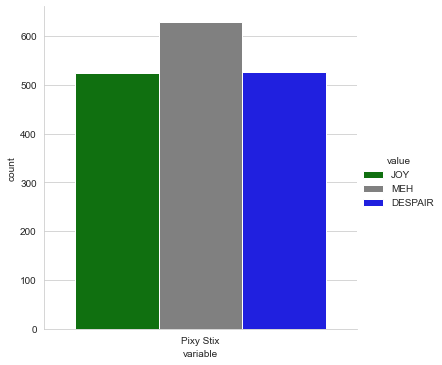

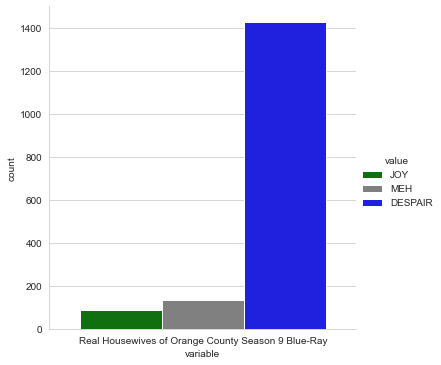

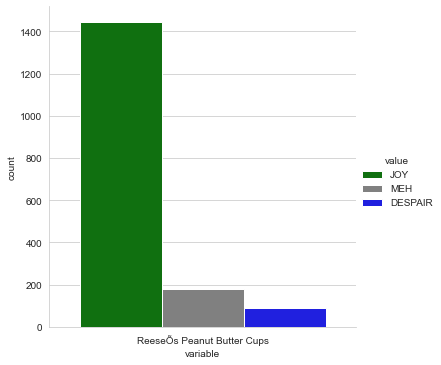

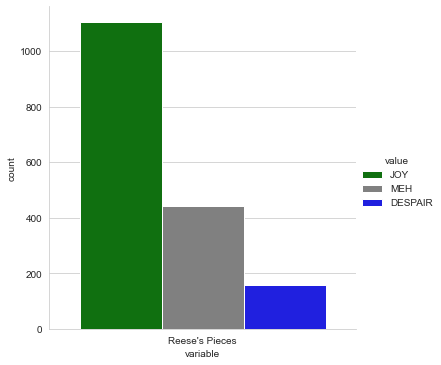

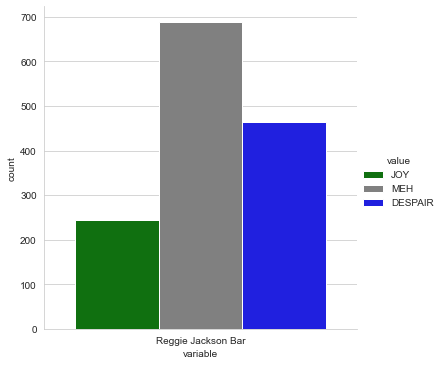

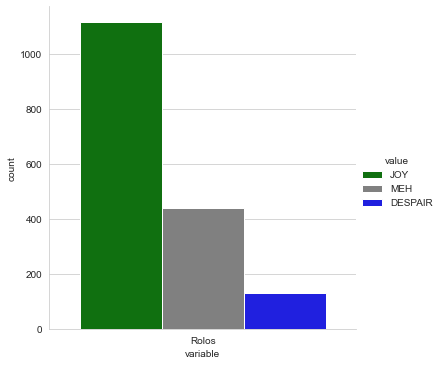

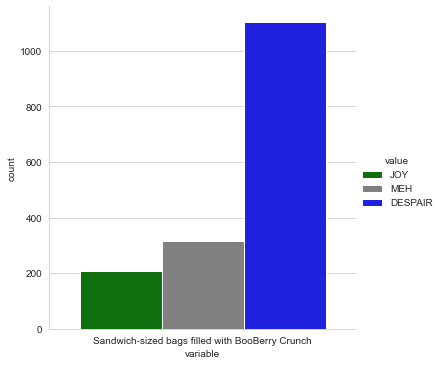

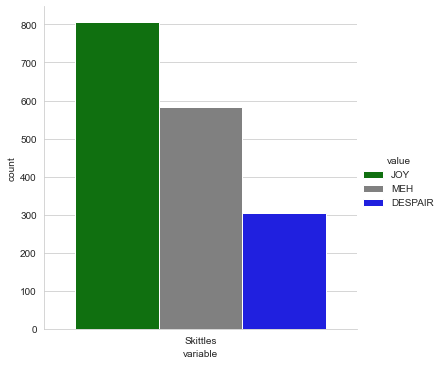

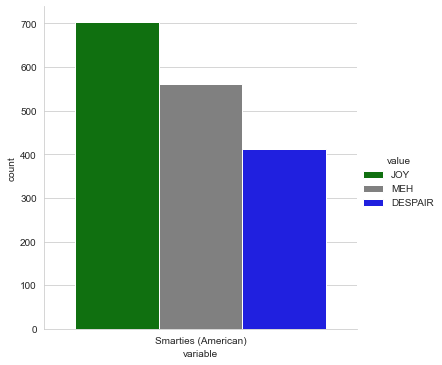

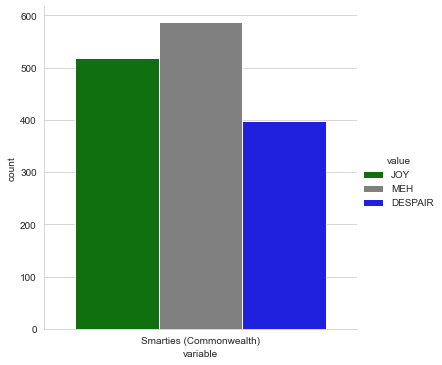

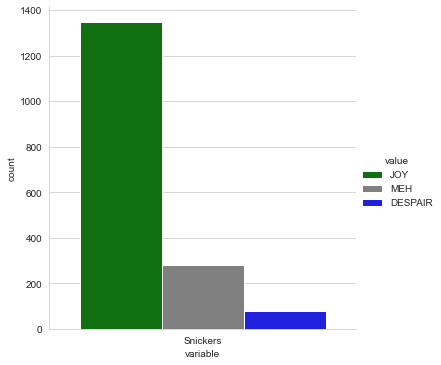

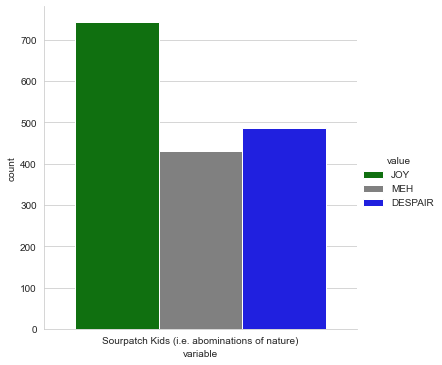

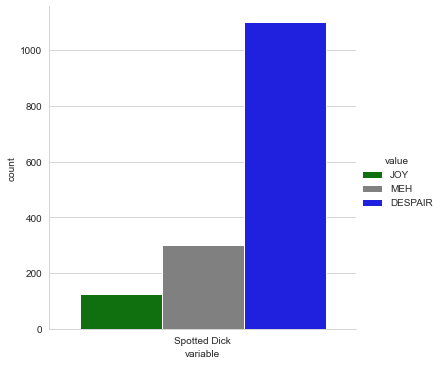

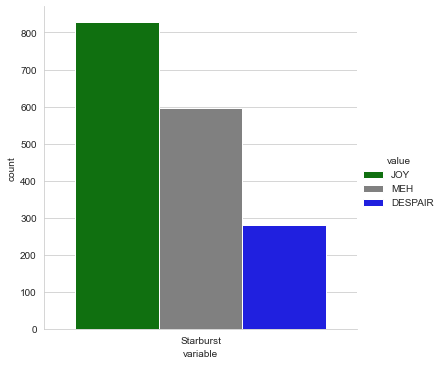

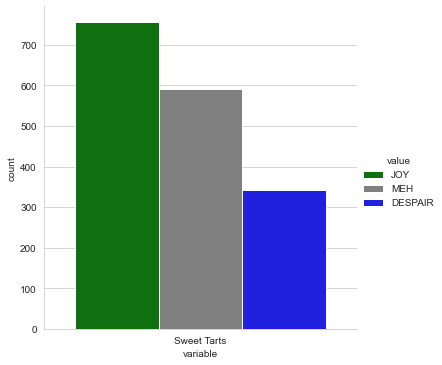

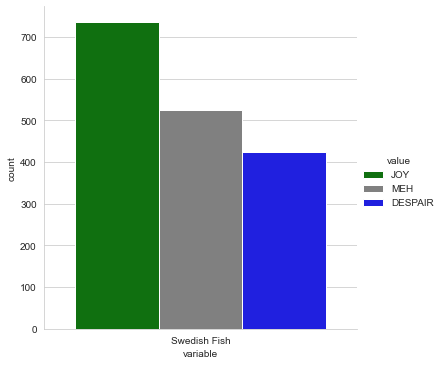

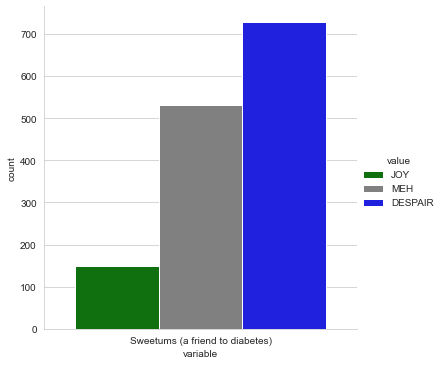

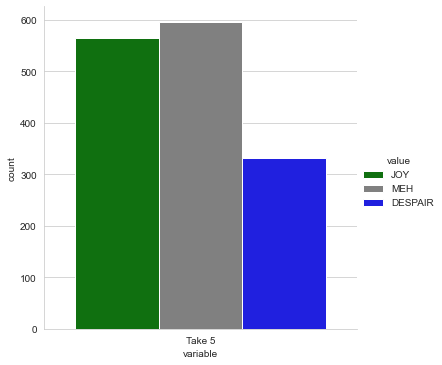

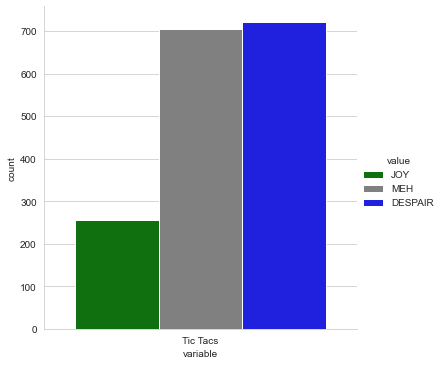

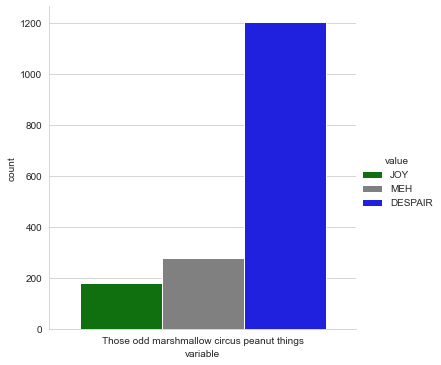

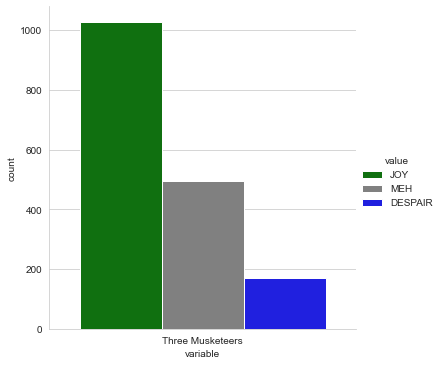

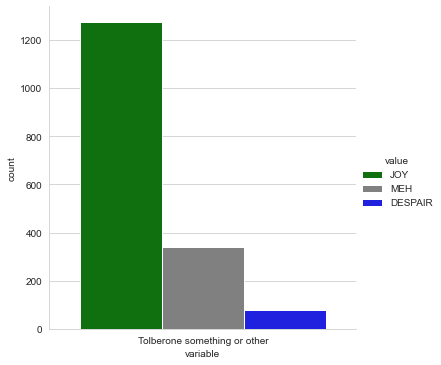

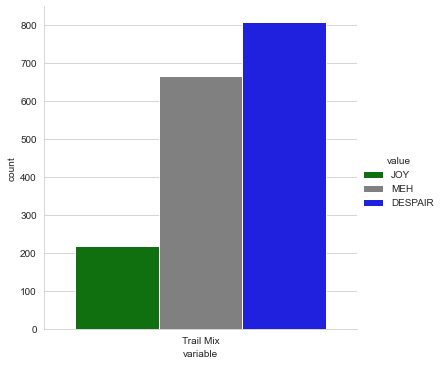

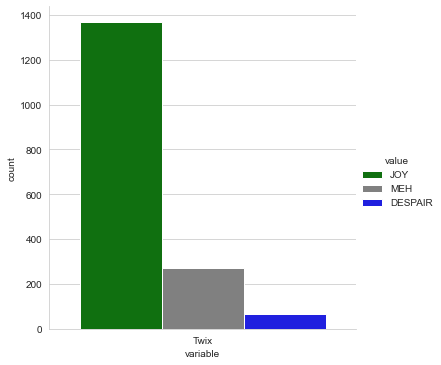

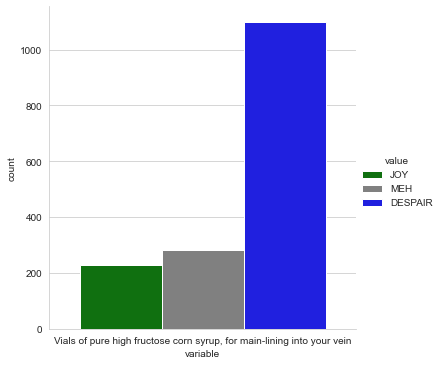

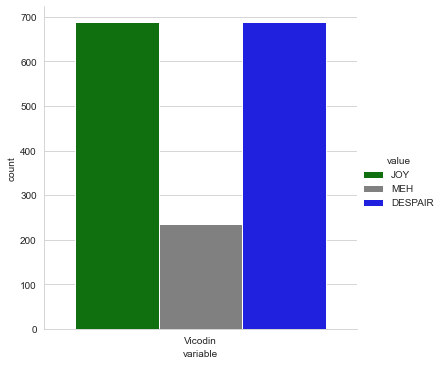

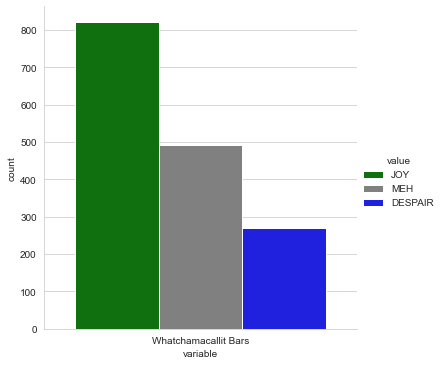

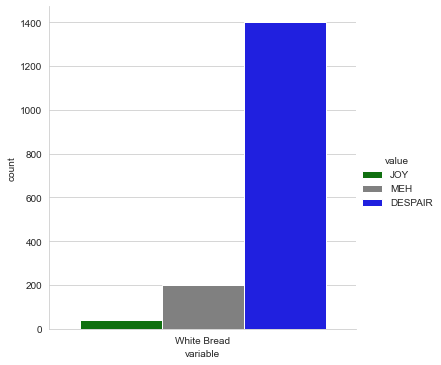

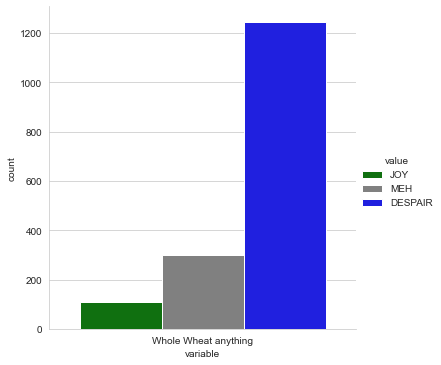

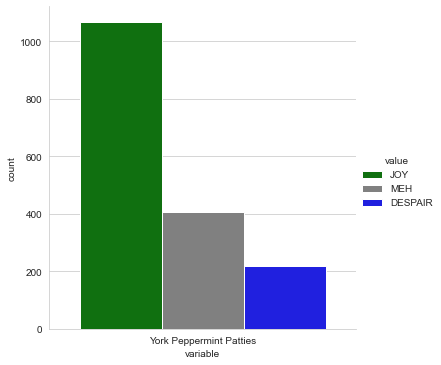

In [32]:
sns.set_style("whitegrid")
sns.set_palette(['green', 'grey', 'blue'])
hue_order=['JOY', 'MEH', 'DESPAIR']
sns.catplot(x = 'variable', data = candymelt[:1736], hue = 'value', kind='count', hue_order=hue_order)
for i in range(1,102):
    z = i*1736
    sns.catplot(x = 'variable', data = candymelt[z:1736+z], hue = 'value', kind='count', hue_order=hue_order)
plt.show()

In [37]:
df = df.reset_index()
df.drop(['index'] , axis="columns", inplace=True)
df.head(5)

,GoingOut,Gender,Age,Country,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),...,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Dress,Day,MediaDailyDish,MediaScience,MediaESPN,MediaYahoo
0,No,Male,44,USA,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,Maybe,Male,49,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,Male,40,USA,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
3,No,Male,23,USA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
4,No,Male,53,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
candy=candy.reset_index()
candy.drop(['index'] , axis="columns", inplace=True)
candy.head(5)

,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
1,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
3,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,JOY,JOY,...,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR
4,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,...,MEH,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR


In [39]:
candymelt=candymelt.reset_index()
candymelt.drop(['index'] , axis="columns", inplace=True)
candymelt.head(5)

,variable,value
0,Anonymous brown globs that come in black and o...,DESPAIR
1,Anonymous brown globs that come in black and o...,DESPAIR
2,Anonymous brown globs that come in black and o...,DESPAIR
3,Anonymous brown globs that come in black and o...,DESPAIR
4,Anonymous brown globs that come in black and o...,DESPAIR


In [40]:
media=media.reset_index()
media.drop(['index'] , axis="columns", inplace=True)
media.head(5)

,Media
0,Science
1,Science
2,Science
3,Science
4,Science


Abdelrahman Mostafa